## Categorical Exploratory Data Analysis on Enthinicity in the Santa Clara County Workforce 

<p>In this EDA, we are going to explore the county workforce dataset and trying to answer below questions:<br><br>
1. How does the entire workforce look like in ethnicity? Which ethnicity has a higher percentage?What about in different job category and departments?<br><br>
2. Are there any associations between enthinicity and job category or which department the workforce is in?<p>


**Structures**:
1. Get the datasource by calling the portal API
2. Explore the data and clean the data if necessary
3. Create plots
4. Use Chi-Square test for associations between categories
5. Conclusions

**Laugange**: Python <br>
**Tools**: Pandas, Numpy, Matplotlib.pyplot, Seaborn, Socrata <br><br>
**Data Source**: [Source]( https://data.sccgov.org/dataset/County-Workforce/tnhw-jtp5 ). Last Updated atJanuary 21, 2021

## import data by calling data portal API

In [1]:
import pandas as pd
from sodapy import Socrata

In [2]:
#Data Last Updated: January 21, 2021
# token, username and password 
client = Socrata("data.sccgov.org",
                 "token",
                 username="email",
                 password="password")

In [3]:
import itertools
items = client.get_all("tnhw-jtp5")
line_count = len(list(items))
results = client.get("tnhw-jtp5",limit=line_count)
df = pd.DataFrame.from_records(results)

### Initial checking on the data frame

In [4]:
df.head()

,service_category,job_category,department,job_classification,ethnicity,age_group,sex
0,Safety Services,Protective Service Workers,DISTRICT ATTORNEY,CRIMINAL INVESTIGATOR II,White,40 - 49,Male
1,Safety Services,Protective Service Workers,DISTRICT ATTORNEY,CRIMINAL INVESTIGATOR II,Two or More Races,50 - 59,Female
2,Safety Services,Protective Service Workers,DISTRICT ATTORNEY,CRIMINAL INVESTIGATOR II,Asian,50 - 59,Male
3,Safety Services,Protective Service Workers,DISTRICT ATTORNEY,CRIMINAL INVESTIGATOR II,Asian,50 - 59,Female
4,Safety Services,Protective Service Workers,DISTRICT ATTORNEY,CRIMINAL INVESTIGATOR II,Hispanic/Latino,50 - 59,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19502 entries, 0 to 19501
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   service_category    19502 non-null  object
 1   job_category        19502 non-null  object
 2   department          19502 non-null  object
 3   job_classification  19502 non-null  object
 4   ethnicity           19502 non-null  object
 5   age_group           19502 non-null  object
 6   sex                 19502 non-null  object
dtypes: object(7)
memory usage: 533.3+ KB


In [6]:
df.describe()

,service_category,job_category,department,job_classification,ethnicity,age_group,sex
count,19502,19502,19502,19502,19502,19502,19502
unique,4,9,47,338,8,5,2
top,Health Services,Professionals,SANTA CLARA VALLEY MED CENTER,Small Job Classification - Omitted for Privacy,Asian,40 - 49,Female
freq,9541,8483,7716,2483,6066,5800,12610


In [7]:
print(df.ethnicity.unique())

['White' 'Two or More Races' 'Asian' 'Hispanic/Latino'
 'Black/African American' 'American Indian/Alaska Native' 'Not Specified'
 'Native Hawaiian/Oth Pac Island']


In [8]:
print(df.job_category.unique())

['Protective Service Workers' 'Officials and Administrators'
 'Professionals' 'Administrative Support' 'Paraprofessionals'
 'Technicians' 'No EEO-4 Reporting' 'Service Maintenance'
 'Skilled Craft Workers']


In [39]:
print(df.department.unique())

['DISTRICT ATTORNEY' 'BEHAVIORAL HEALTH SERVICES' 'SOCIAL SERVICES AGENCY'
 'COUNTY EXECUTIVE' 'FACILITIES' 'PUBLIC DEFENDER' 'PRETRIAL SERVICES'
 "SHERIFF'S OFFICE" 'PROBATION DEPARTMENT' 'PARKS & RECREATION'
 'COUNTY COUNSEL' 'CLERK OF THE BOARD' 'EMPLOYEE SERVICES AGENCY'
 'SANTA CLARA VALLEY MED CENTER' 'ASSESSOR' 'CONTROLLER - TREASURER'
 'DEPARTMENT OF CORRECTION' 'SUPERVISORIAL DISTRICT 1'
 'SUPERVISORIAL DISTRICT 5' 'SUPERVISORIAL DISTRICT 2'
 'SUPERVISORIAL DISTRICT 3' 'CUSTODY HEALTH SERVICES'
 'SUPERVISORIAL DISTRICT 4' 'AGRICULTURE & ENVIRON MGMT'
 'TECHNOLOGY SVCS & SOLUTIONS' 'REGISTRAR OF VOTERS'
 'PLANNING & DEVELOPMENT' 'COUNTY CLERK-RECORDER' 'PROCUREMENT DEPARTMENT'
 'COUNTY COMMUNICATIONS' 'COUNTY LIBRARY DISRICT' 'AIRPORTS'
 'ROADS DEPARTMENT' 'VALLEY HEALTH PLAN' 'PUBLIC HEALTH DEPARTMENT'
 'SHERIFF-DOC CONTRACT' 'FLEET SERVICES' 'VECTOR CONTROL DISTRICT'
 'DEPT OF ENVIRONMENTAL HEALTH' 'MEDICAL EXAMINER-CORONER'
 'COMMUNITY HEALTH SERVICES' 'LOCAL AGENCY FORMATIO

In [9]:
range_list = range(len(df.job_category))
df.insert(0, 'id', range_list)
df.head()

,id,service_category,job_category,department,job_classification,ethnicity,age_group,sex
0,0,Safety Services,Protective Service Workers,DISTRICT ATTORNEY,CRIMINAL INVESTIGATOR II,White,40 - 49,Male
1,1,Safety Services,Protective Service Workers,DISTRICT ATTORNEY,CRIMINAL INVESTIGATOR II,Two or More Races,50 - 59,Female
2,2,Safety Services,Protective Service Workers,DISTRICT ATTORNEY,CRIMINAL INVESTIGATOR II,Asian,50 - 59,Male
3,3,Safety Services,Protective Service Workers,DISTRICT ATTORNEY,CRIMINAL INVESTIGATOR II,Asian,50 - 59,Female
4,4,Safety Services,Protective Service Workers,DISTRICT ATTORNEY,CRIMINAL INVESTIGATOR II,Hispanic/Latino,50 - 59,Female


## Visualizations

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [324]:
# create a another sub dataframe from the main data frame, contains department, job_cateogry, ethinicity column
# filter out rows with 'Not Specific' as ethicity 

df_ethnicity = df[['id','job_category','department','ethnicity']]
df_ethnicity = df_ethnicity[(df.ethnicity != 'Not Specified') ]
df_ethnicity.head()

,id,job_category,department,ethnicity
0,0,Protective Service Workers,DISTRICT ATTORNEY,White
1,1,Protective Service Workers,DISTRICT ATTORNEY,Two or More Races
2,2,Protective Service Workers,DISTRICT ATTORNEY,Asian
3,3,Protective Service Workers,DISTRICT ATTORNEY,Asian
4,4,Protective Service Workers,DISTRICT ATTORNEY,Hispanic/Latino


* Viz 1: percentage over ethnicity

In [242]:
import squarify
import numpy as np

In [281]:
df_ethnicity_size = df_ethnicity[['id','ethnicity']]
df_ethnicity_size= df_ethnicity_size.groupby(['ethnicity'])['id'].count().reset_index()
df_ethnicity_size = df_ethnicity_size.sort_values(by=['id'], ascending = False)
df_ethnicity_size['pct'] = round((df_ethnicity_size.id/df_ethnicity_size.id.sum()) *100,2)
df_ethnicity_size['pct']  = df_ethnicity_size['pct'].astype(str) + '%'
df_ethnicity_size

,ethnicity,id,pct
1,Asian,6066,35.87%
3,Hispanic/Latino,4951,29.28%
6,White,4030,23.83%
2,Black/African American,993,5.87%
5,Two or More Races,650,3.84%
4,Native Hawaiian/Oth Pac Island,150,0.89%
0,American Indian/Alaska Native,70,0.41%


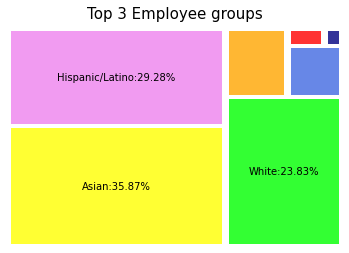

In [308]:
labels = list (df_ethnicity_size['ethnicity']+":"+ df_ethnicity_size['pct'])
colors = ['yellow','violet','lime','orange', 'royalblue','Red','navy']
squarify.plot(sizes=df_ethnicity_size['id'], color = colors, label = labels[:3],alpha=.8, text_kwargs={'fontsize':10}, pad = True)
plt.axis('off')
plt.title('Top 3 Employee groups', size = 15, pad = 10)
plt.show()

In [ ]:
# create a pivot table
df_ethnicity_pivot = pd.pivot_table(df_ethnicity, 
                                    index=['job_category','department'],
                                    columns =['ethnicity'], 
                                    values ='id', 
                                    fill_value = 0,
                                    aggfunc = 'count').reset_index()
df_ethnicity_pivot.head()

In [163]:
# using group by function to double check if pivot table data is correct
df_ethnicity[(df_ethnicity.job_category == 'Administrative Support') &(df_ethnicity.ethnicity=='Asian')].groupby(['job_category','ethnicity']).count()

,,id,department
job_category,ethnicity,,
Administrative Support,Asian,932,932


* Viz 2 : job category and ethnicity

In [167]:
df_job_category = df_ethnicity.groupby(['job_category','ethnicity']).count().reset_index()
df_job_category = df_job_category.sort_values(by =['id','job_category'], ascending=False)
df_job_category.head()

,job_category,ethnicity,id,department
24,Professionals,Asian,3375,3375
29,Professionals,White,1973,1973
3,Administrative Support,Hispanic/Latino,1738,1738
26,Professionals,Hispanic/Latino,1291,1291
1,Administrative Support,Asian,932,932


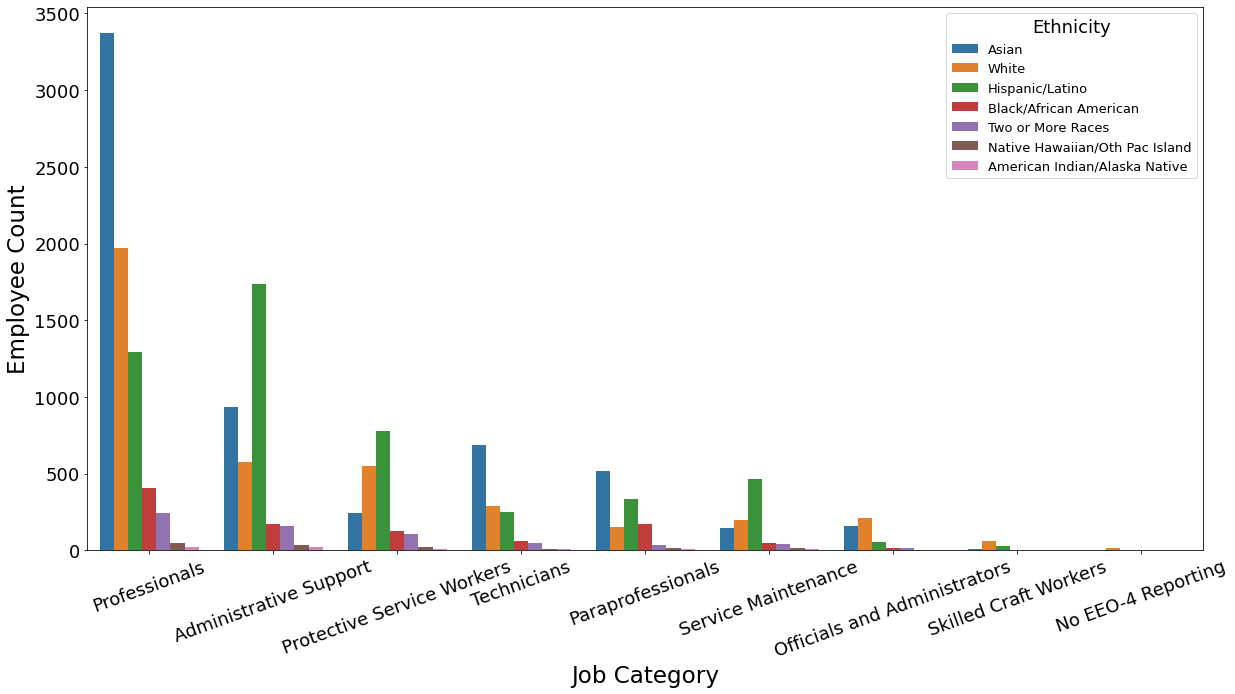

In [313]:
plt.figure(figsize=(20,10))
sns.barplot(x="job_category", y="id", hue="ethnicity",  data=df_job_category)
plt.xticks(rotation= 20)
plt.xlabel('Job Category')
plt.ylabel('Employee Count')
plt.legend(title = 'Ethnicity', loc = 'upper right')
plt.show()

In [319]:
'''since there is a significant difference between the total counts for the first three biggest job category groups and the rest, 
we will creat a another plot just to show the rest in a clearer way'''
df_job_category_sub1= df_job_category[(df_job_category.job_category !='Administrative Support')
                                          &(df_job_category.job_category !='Professionals')
                                          &(df_job_category.job_category !='Protective Service Workers')]

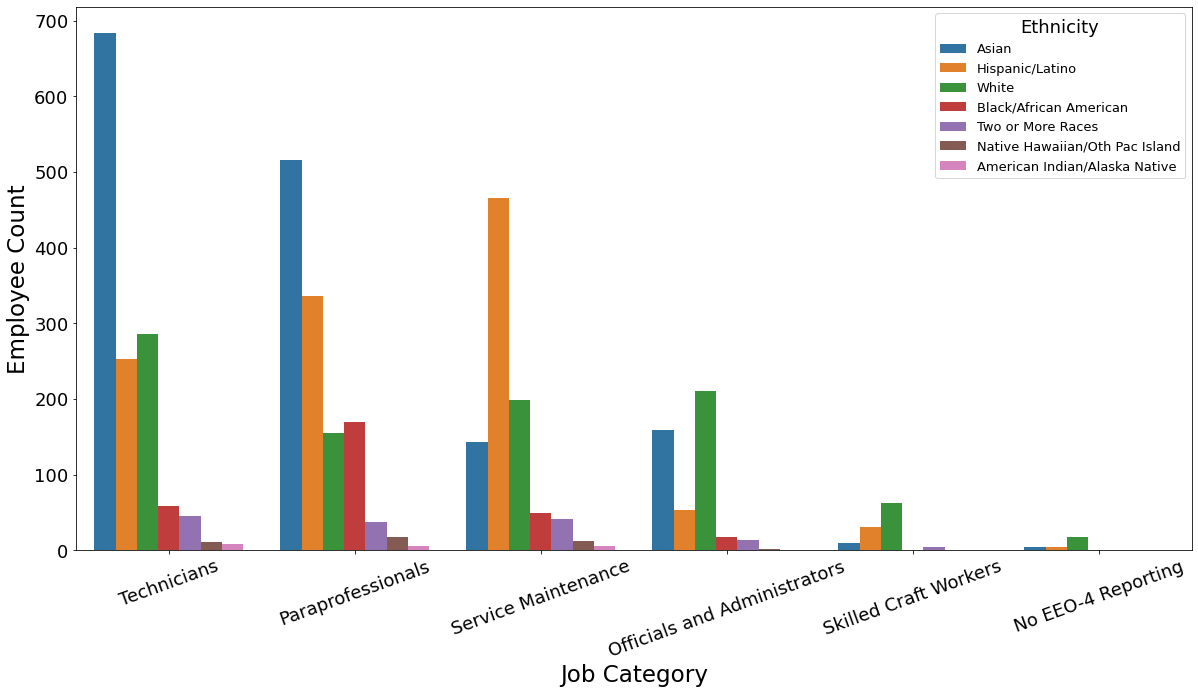

In [317]:
# plot a seperate plot
plt.figure(figsize=(20,10))
sns.barplot(x="job_category", y="id", hue="ethnicity",data=df_job_category_sub1)
plt.ylabel('Employee Count')
plt.xlabel('Job Category')
plt.legend(title = 'Ethnicity', loc = 'upper right')
plt.xticks(rotation = 20)
plt.show()

* Viz 3: Ethnicity and department (top 10 with most employees)

In [175]:
df_department= df_ethnicity.groupby(['department','ethnicity']).count().reset_index()
df_department['total'] = df_department['id'].groupby(df_department['department']).transform('sum')
df_department['rank'] = df_department['total'].rank(ascending=False,method='dense')
df_department = df_department.sort_values(by = ['rank'])
df_department.head()

,department,ethnicity,id,job_category,total,rank
200,SANTA CLARA VALLEY MED CENTER,White,1450,1450,6981,1.0
199,SANTA CLARA VALLEY MED CENTER,Two or More Races,213,213,6981,1.0
198,SANTA CLARA VALLEY MED CENTER,Native Hawaiian/Oth Pac Island,67,67,6981,1.0
197,SANTA CLARA VALLEY MED CENTER,Hispanic/Latino,1450,1450,6981,1.0
196,SANTA CLARA VALLEY MED CENTER,Black/African American,452,452,6981,1.0


In [173]:
df_department_top = df_department[df_eth_dep['rank'] <= 10]
df_department_top = df_department_top.sort_values(by = ['total','id'], ascending = False)

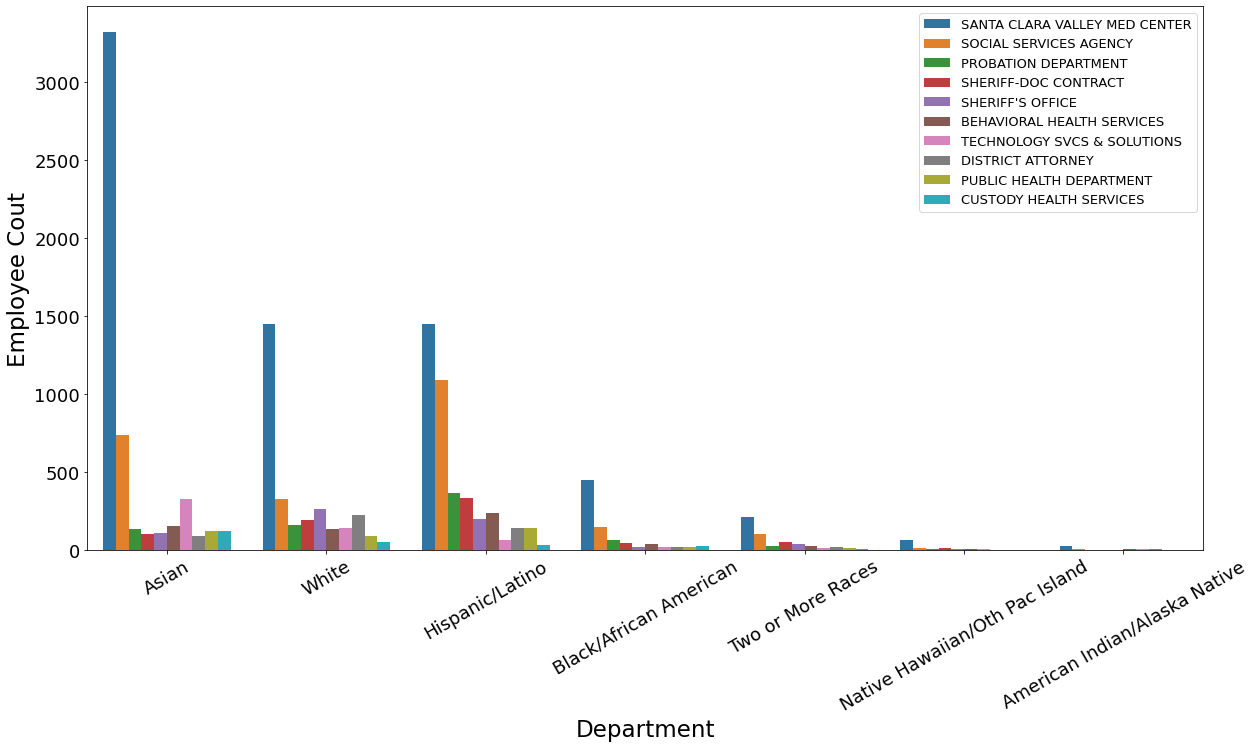

In [328]:
plt.figure(figsize=(20,10))
sns.barplot(x="ethnicity", y="id", hue="department",  data=df_department_top)
plt.xticks(rotation = 30)
plt.legend(loc='upper right')
plt.xlabel('Department')
plt.ylabel('Employee Cout')
plt.show()

### Hypothesis testing on categorical data, using Chi-square
* H0: There is no association betwen job category and ethnicity
* H1: There is association between job category and ethnicity

In [13]:
from scipy.stats import chi2_contingency

In [326]:
table_job_category = pd.crosstab(df_ethnicity['ethnicity'], df_ethnicity['job_category'])
chi2, pval, dof, expected = chi2_contingency(table_job_category)
print(pval <= 0.05)

True


In [327]:
table_department = pd.crosstab(df_ethnicity['ethnicity'], df_ethnicity['department'])
chi2, pval, dof, expected = chi2_contingency(table_department)
print(pval <= 0.05)

True


### Conclusions:
<p>In the workforce: <br>

1. Almost 36% of the employees are Asian, 29% Hispanic and then followed by White employees, 24%.<br><br>

2. Among all the job categories, professionals, administrative support, protective service workers and technicians are the biggest groups. Asian employees dominiate professionals and Technicians job categories while, Hispanic employees dominate in job categories of Administrative Support and Protective Service Workers.<br><br>

3. In all the departments, most of the Asian employees work in Santa Clara Valley Med Center, same as Hispanic and White employee. Compared with Asian and White employees, there is a higher percentage of Hispanic employees work in the social services agency.<br><br>

4. As the results of Chi-square test, both results are significant, meaning there are associations between ethnicity and job cateogry and department respectively. However since the categories may not be completely independent from each other which violates the assumptions, we can not draw the conclusions that the association is actually there. <p>